In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ssa_functions import *
import sys
sys.path.append(sys.path[0][:-9] + "/common/")
import functions
import statsmodels.api as sm

M = 12

data = pd.read_csv("data.csv", decimal = ',', sep = ';')
print("data shape" + str(data.shape))
X = create_matrix(data.to_numpy(), M)
pd.DataFrame(X).to_excel("matrixes/X.xlsx")

data shape(48, 1)


In [2]:
# getting correlation matrix for X matrix
corr_x_matrix = np.corrcoef(np.transpose(X))
pd.DataFrame(corr_x_matrix).to_excel("matrixes/X_correlations.xlsx")

#getting own meanings
c_L = functions.eig_matlab(corr_x_matrix)[0]
pd.DataFrame(c_L).to_excel("matrixes/corr_lambdas.xlsx")

# gerring number of values > 1
for i in range(c_L.shape[1]):
    if c_L[i,i] < 1:
        break

/home/kfa/KFA/Programming/multivariate_statistical_analysis//common/functions.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  temp[i] = l


In [3]:
A = np.dot(X,np.transpose(X))
[L, V] = functions.eig_matlab(A)

V= V[:,0:i]

pd.DataFrame(V).to_excel("matrixes/vectors.xlsx")

X_n = np.dot(np.dot(V,np.transpose(V)), X)
pd.DataFrame(X_n).to_excel("matrixes/new_X_matrix.xlsx")

In [4]:
new_data = reconstruct_series(X_n)
data['ssa_series'] = new_data
print(data['ssa_series'].to_list())


[314.4669733670622, 315.5245825889568, 318.39084369202584, 321.4174874685699, 328.1817192414686, 329.76812829824667, 319.89419121250364, 305.19777183006977, 291.05131256015045, 281.47659542276136, 279.81383241403444, 310.72379029579565, 319.6576055164192, 329.9063391770636, 341.2087016247901, 355.8406600097143, 368.70096609762294, 380.7772741653993, 388.2746858782006, 383.77186088271077, 371.5420166405482, 362.1674035476253, 364.2700238315061, 376.67188097779086, 383.93754055717415, 375.5532620771144, 353.46967797271856, 337.38097182430903, 344.5170326694373, 370.1673384844085, 398.87379370179036, 426.02390725334374, 456.9138493178453, 497.2328255107741, 533.659837004023, 543.865173054627, 518.8985868587857, 434.26856042173864, 396.6336576412622, 380.9774243843087, 378.99884947757334, 370.1359667338576, 351.66383573159436, 334.1608347915662, 334.30816144778424, 364.23648776405986, 410.72424719919525, 447.35337190790466]


In [5]:
# building arima model using input data
# stationarity test
print("ADF test: p=%f" % sm.tsa.stattools.adfuller(data['y'])[1])
data['diff1'] = data['y'] - data['y'].shift(1)
print("ADF test: p=%f" % sm.tsa.stattools.adfuller(data['diff1'][1:])[1])

ADF test: p=0.357234
ADF test: p=0.000006


<ipython-input-6-767e9bc12381>:2: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot('211')
<ipython-input-6-767e9bc12381>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot('212')


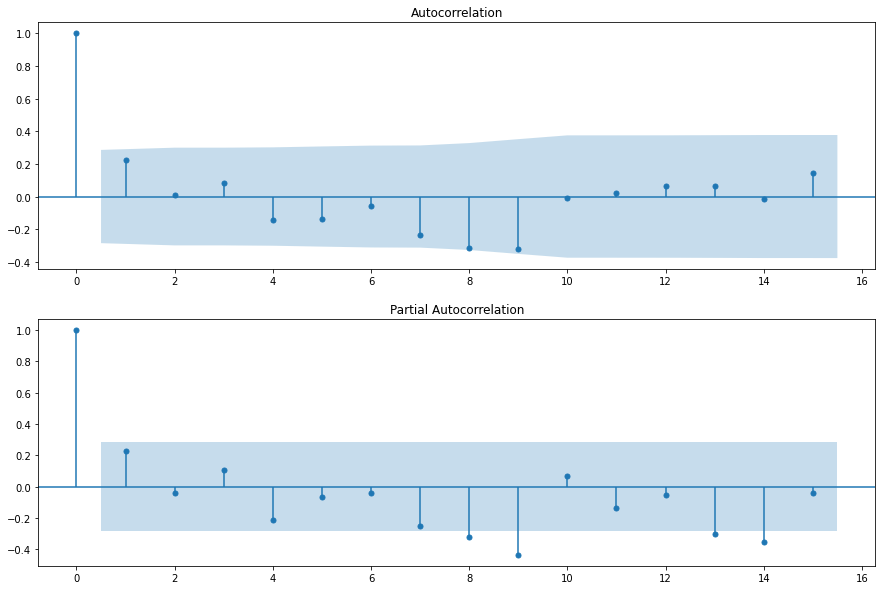

In [6]:
fig = plt.figure(figsize = [15, 10])
ax = plt.subplot('211')
a = sm.graphics.tsa.plot_acf(data['diff1'][1:], lags=15, ax = ax)

ax = plt.subplot('212')
a = sm.graphics.tsa.plot_pacf(data['diff1'][1:], lags=15, ax = ax)
plt.savefig("pictures/correlogramm_diff1.png")


In [6]:
# find order with best AIC
test = sm.tsa.arma_order_select_ic(data['diff1'][1:],max_ar=5, max_ma=5, ic='aic')

del.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/kfa/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/kfa/.local/lib/python3.8/site-packages/statsmod

In [14]:
test['aic'].to_excel("matrixes/best_aic_selection.xlsx")
print(test)

NameError: name 'test' is not defined

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:             SARIMAX([9], 1, 0)   Log Likelihood                -214.766
Date:                Sat, 03 Jul 2021   AIC                            433.532
Time:                        22:47:21   BIC                            437.233
Sample:                             0   HQIC                           434.925
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L9         -0.3632      0.184     -1.977      0.048      -0.723      -0.003
sigma2       530.6518    124.093      4.276      0.000     287.433     773.871
Ljung-Box (L1) (Q):                   1.21   Jarque-

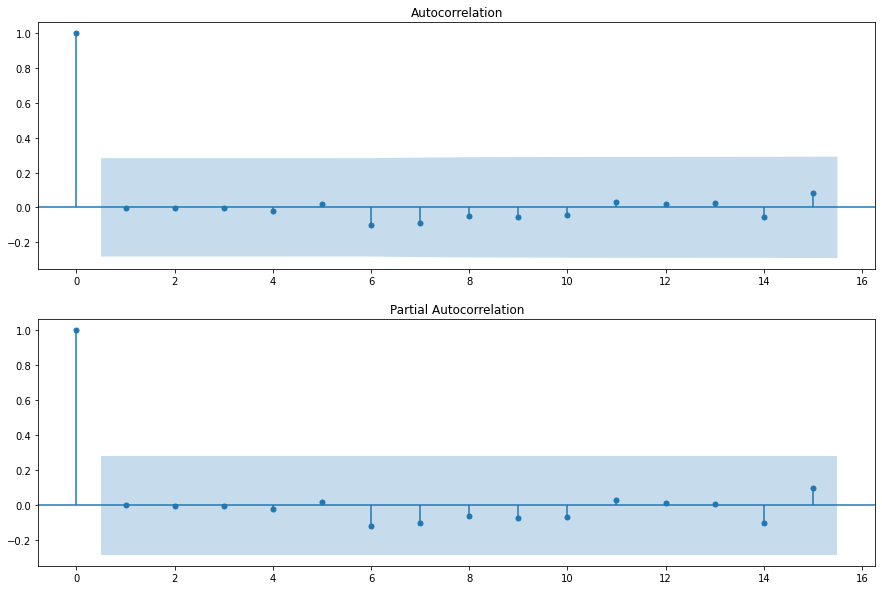

In [7]:
#model=sm.tsa.statespace.SARIMAX(data['y'], order=([1,2,5,6,7,8,9,10], 1, [1,2,4,5,6,7,8,9,10])).fit(disp=-1)
model=sm.tsa.statespace.SARIMAX(data['y'], order=([9], 1, [])).fit(disp=-1)
print(model.summary())

data['pred'] = model.predict(start=0, end=48)

fig = plt.figure(figsize = [15, 10])
ax = plt.subplot('211')
a = sm.graphics.tsa.plot_acf(model.resid, lags=15, ax = ax)

ax = plt.subplot('212')
a = sm.graphics.tsa.plot_pacf(model.resid, lags=15, ax = ax)

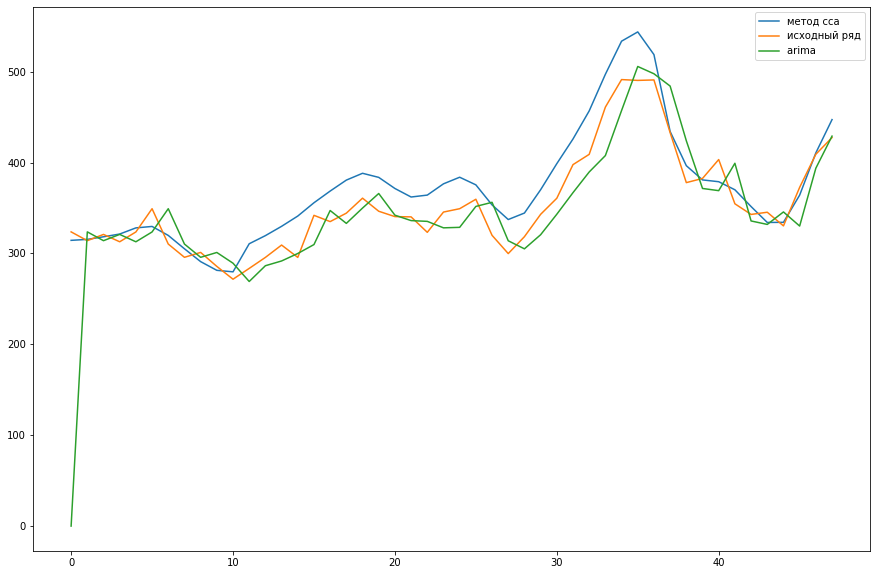

In [9]:

fig = plt.figure(figsize = [15,10])

plt.plot(data['ssa_series'])
plt.plot(data['y'])
plt.plot(data['pred'])
plt.legend(['ssa', 'исходный ряд', 'arima '])

plt.savefig("pictures/result.png")

In [16]:
print("variance of ssa method " + str((((data['y'] - data['ssa_series']).to_numpy())**2).sum()))
print("variance of arima " + str((((data['y'] - data['pred']).to_numpy())**2).sum()))

variance of ssa method 32106.752916063568
variance of arima 130176.78188051633


In [17]:
N = data['y'].shape[0]

result = ssa_forecaster(V, N, M, data['y'].to_numpy(), 3)
print(result[-3:])

[443.150165  426.1512954 417.2603125]
